# Mitsuba Spectral Image Rendering

An exploratory notebook about Mitsuba spectral image rendering.

A companion Google Colab Notebook for image processing is available at this [url](https://colab.research.google.com/drive/1oW6f0XwCZFiJYij4d6jHQCNFU1CVLnQ7).

More information is available on [ACEScentral](https://acescentral.com/c/aces-development-acesnext/vwg-aces-gamut-mapping-working-group/).

*TODO*:

* Agree on and define a sensitivities normalisation method with the Working Group
* Rendering currently involves changing the CMFs for the various camera sensitivities which requires re-compilation and re-rendering. This is wasteful and we should ideally only render a single hyper-spectral image

In [0]:
#@title Global Parameters

IMAGE_WIDTH = 1024 #@param {type: "number", min: 64, max: 2048}
IMAGE_HEIGHT = 1024 #@param {type: "number", min: 64, max: 2048}
SPP = 4096 #@param {type: "number", min: 1, max: 8192}
RECIPROCAL_QUALITY = 1 #@param [1, 2, 4, 8, 16]
ILLUMINANT_A = 'A' #@param ['3-LED-1 (457/540/605)', '3-LED-2 (473/545/616)', '3-LED-2 Yellow', '3-LED-3 (465/546/614)', '3-LED-4 (455/547/623)', '4-LED No Yellow', '4-LED Yellow', '4-LED-1 (461/526/576/624)', '4-LED-2 (447/512/573/627)', '60 A/W (Soft White)', 'A', 'B', 'C', 'C100S54 (HPS)', 'C100S54C (HPS)', 'Cool White FL', 'D50', 'D55', 'D60', 'D65', 'D75', 'Daylight FL', 'E', 'F32T8/TL830 (Triphosphor)', 'F32T8/TL835 (Triphosphor)', 'F32T8/TL841 (Triphosphor)', 'F32T8/TL850 (Triphosphor)', 'F32T8/TL865 /PLUS (Triphosphor)', 'F34/CW/RS/EW (Cool White FL)', 'F34T12/LW/RS /EW', 'F34T12WW/RS /EW (Warm White FL)', 'F40/C50 (Broadband FL)', 'F40/C75 (Broadband FL)', 'F40/CWX (Broadband FL)', 'F40/DX (Broadband FL)', 'F40/DXTP (Delux FL)', 'F40/N (Natural FL)', 'FL1', 'FL10', 'FL11', 'FL12', 'FL2', 'FL3', 'FL3.1', 'FL3.10', 'FL3.11', 'FL3.12', 'FL3.13', 'FL3.14', 'FL3.15', 'FL3.2', 'FL3.3', 'FL3.4', 'FL3.5', 'FL3.6', 'FL3.7', 'FL3.8', 'FL3.9', 'FL4', 'FL5', 'FL6', 'FL7', 'FL8', 'FL9', 'H38HT-100 (Mercury)', 'H38JA-100/DX (Mercury DX)', 'HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HPS', 'ID50', 'ID65', 'Incandescent', 'Kinoton 75P', 'LED-B1', 'LED-B2', 'LED-B3', 'LED-B4', 'LED-B5', 'LED-BH1', 'LED-RGB1', 'LED-V1', 'LED-V2', 'LPS', 'Luxeon WW 2880', 'MHC100/U/MP /3K', 'MHC100/U/MP /4K', 'Mercury', 'Metal Halide', 'Natural', 'Neodimium Incandescent', 'PHOS-1', 'PHOS-2', 'PHOS-3', 'PHOS-4', 'Philips TL-84', 'Phosphor LED YAG', 'SA', 'SC', 'SDW-T 100W/LV (Super HPS)', 'Super HPS', 'T8 Luxline Plus White', 'T8 Polylux 3000', 'T8 Polylux 4000', 'Thorn Kolor-rite', 'Triphosphor FL']
ILLUMINANT_B = 'Daylight FL' #@param ['3-LED-1 (457/540/605)', '3-LED-2 (473/545/616)', '3-LED-2 Yellow', '3-LED-3 (465/546/614)', '3-LED-4 (455/547/623)', '4-LED No Yellow', '4-LED Yellow', '4-LED-1 (461/526/576/624)', '4-LED-2 (447/512/573/627)', '60 A/W (Soft White)', 'A', 'B', 'C', 'C100S54 (HPS)', 'C100S54C (HPS)', 'Cool White FL', 'D50', 'D55', 'D60', 'D65', 'D75', 'Daylight FL', 'E', 'F32T8/TL830 (Triphosphor)', 'F32T8/TL835 (Triphosphor)', 'F32T8/TL841 (Triphosphor)', 'F32T8/TL850 (Triphosphor)', 'F32T8/TL865 /PLUS (Triphosphor)', 'F34/CW/RS/EW (Cool White FL)', 'F34T12/LW/RS /EW', 'F34T12WW/RS /EW (Warm White FL)', 'F40/C50 (Broadband FL)', 'F40/C75 (Broadband FL)', 'F40/CWX (Broadband FL)', 'F40/DX (Broadband FL)', 'F40/DXTP (Delux FL)', 'F40/N (Natural FL)', 'FL1', 'FL10', 'FL11', 'FL12', 'FL2', 'FL3', 'FL3.1', 'FL3.10', 'FL3.11', 'FL3.12', 'FL3.13', 'FL3.14', 'FL3.15', 'FL3.2', 'FL3.3', 'FL3.4', 'FL3.5', 'FL3.6', 'FL3.7', 'FL3.8', 'FL3.9', 'FL4', 'FL5', 'FL6', 'FL7', 'FL8', 'FL9', 'H38HT-100 (Mercury)', 'H38JA-100/DX (Mercury DX)', 'HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HPS', 'ID50', 'ID65', 'Incandescent', 'Kinoton 75P', 'LED-B1', 'LED-B2', 'LED-B3', 'LED-B4', 'LED-B5', 'LED-BH1', 'LED-RGB1', 'LED-V1', 'LED-V2', 'LPS', 'Luxeon WW 2880', 'MHC100/U/MP /3K', 'MHC100/U/MP /4K', 'Mercury', 'Metal Halide', 'Natural', 'Neodimium Incandescent', 'PHOS-1', 'PHOS-2', 'PHOS-3', 'PHOS-4', 'Philips TL-84', 'Phosphor LED YAG', 'SA', 'SC', 'SDW-T 100W/LV (Super HPS)', 'Super HPS', 'T8 Luxline Plus White', 'T8 Polylux 3000', 'T8 Polylux 4000', 'Thorn Kolor-rite', 'Triphosphor FL']
EMITTER = 'Daylight FL' #@param ['3-LED-1 (457/540/605)', '3-LED-2 (473/545/616)', '3-LED-2 Yellow', '3-LED-3 (465/546/614)', '3-LED-4 (455/547/623)', '4-LED No Yellow', '4-LED Yellow', '4-LED-1 (461/526/576/624)', '4-LED-2 (447/512/573/627)', '60 A/W (Soft White)', 'A', 'B', 'C', 'C100S54 (HPS)', 'C100S54C (HPS)', 'Cool White FL', 'D50', 'D55', 'D60', 'D65', 'D75', 'Daylight FL', 'E', 'F32T8/TL830 (Triphosphor)', 'F32T8/TL835 (Triphosphor)', 'F32T8/TL841 (Triphosphor)', 'F32T8/TL850 (Triphosphor)', 'F32T8/TL865 /PLUS (Triphosphor)', 'F34/CW/RS/EW (Cool White FL)', 'F34T12/LW/RS /EW', 'F34T12WW/RS /EW (Warm White FL)', 'F40/C50 (Broadband FL)', 'F40/C75 (Broadband FL)', 'F40/CWX (Broadband FL)', 'F40/DX (Broadband FL)', 'F40/DXTP (Delux FL)', 'F40/N (Natural FL)', 'FL1', 'FL10', 'FL11', 'FL12', 'FL2', 'FL3', 'FL3.1', 'FL3.10', 'FL3.11', 'FL3.12', 'FL3.13', 'FL3.14', 'FL3.15', 'FL3.2', 'FL3.3', 'FL3.4', 'FL3.5', 'FL3.6', 'FL3.7', 'FL3.8', 'FL3.9', 'FL4', 'FL5', 'FL6', 'FL7', 'FL8', 'FL9', 'H38HT-100 (Mercury)', 'H38JA-100/DX (Mercury DX)', 'HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HPS', 'ID50', 'ID65', 'Incandescent', 'Kinoton 75P', 'LED-B1', 'LED-B2', 'LED-B3', 'LED-B4', 'LED-B5', 'LED-BH1', 'LED-RGB1', 'LED-V1', 'LED-V2', 'LPS', 'Luxeon WW 2880', 'MHC100/U/MP /3K', 'MHC100/U/MP /4K', 'Mercury', 'Metal Halide', 'Natural', 'Neodimium Incandescent', 'PHOS-1', 'PHOS-2', 'PHOS-3', 'PHOS-4', 'Philips TL-84', 'Phosphor LED YAG', 'SA', 'SC', 'SDW-T 100W/LV (Super HPS)', 'Super HPS', 'T8 Luxline Plus White', 'T8 Polylux 3000', 'T8 Polylux 4000', 'Thorn Kolor-rite', 'Triphosphor FL']
USE_OBSERVER_CMFS = False #@param {type:"boolean"}
CAMERA_SENSITIVITIES = 'Pentax K-5' #@param ['ACES RICD', 'Canon 1DMarkIII', 'Canon 20D', 'Canon 300D', 'Canon 40D', 'Canon 500D', 'Canon 50D', 'Canon 5DMarkII', 'Canon 600D', 'Canon 60D', 'Fujifilm X-T2', 'Hasselblad H2', 'Nikon D200', 'Nikon D3', 'Nikon D300s', 'Nikon D3X', 'Nikon D40', 'Nikon D50', 'Nikon D5100', 'Nikon D700', 'Nikon D80', 'Nikon D90', 'Nokia N900', 'Olympus E-PL2', 'Pentax K-5', 'Pentax Q', 'Phase One', 'Point Grey Grasshopper 50S5C', 'Point Grey Grasshopper2 14S5C', 'SONY NEX-5N', 'arri d21', 'canon eos 5d mark ii', 'canon powershot s90', 'canon xti', 'nikon d200', 'nikon d5100', 'nikon d70', 'nikon d700', 'nikon d7000', 'sony ilce-7rm2', 'sony ilce-7sm2']

## Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Directory where rendered images are written, needs to be updated accordingly.
OUTPUT_DIRECTORY = '/content/drive/My Drive/Fast.io/academy-vwg-gm-mitsuba-spectral-images.imfast.io'
# Directory where existing Mitsuba builds are retrieved from or 
# stored upon compilation, needs to be updated accordingly.
MITSUBA_BUILDS_DIRECTORY = '/content/drive/My Drive/Public/Mitsuba2-Google-Colab-Builds'

## colour-science Requirements

In [0]:
!pip install colour-datasets

!python -c "import imageio;imageio.plugins.freeimage.download()"

!pip uninstall -y colour-science
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout develop && git pull && cd ..; fi

import sys
sys.path.append('colour')

     |████████████████████████████████| 102kB 3.0MB/s 
     |████████████████████████████████| 1.6MB 8.9MB/s 
Imageio: 'libfreeimage-3.16.0-linux64.so' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/libfreeimage-3.16.0-linux64.so (4.6 MB)
Downloading: 8192/4830080 bytes (0.2%)704512/4830080 bytes (14.6%)2031616/4830080 bytes (42.1%)3932160/4830080 bytes (81.4%)4830080/4830080 bytes (100.0%)
  Done
File saved as /root/.imageio/freeimage/libfreeimage-3.16.0-linux64.so.
Uninstalling colour-science-0.3.15:
  Successfully uninstalled colour-science-0.3.15
Cloning into 'colour'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 41057 (delta 84), reused 109 (delta 50), pack-reused 40850
Rece

In [0]:
import colour
import colour_datasets
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import shutil
import subprocess
from copy import deepcopy

colour.plotting.colour_style()

plt.style.use({'figure.figsize': (19.20, 10.80)})

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.6.9 (default, Nov  7 2019, 10:44:02)                       *
*                [GCC 8.3.0]                                                  *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.3.15-26-g07c1c641                                         *
*       colour-datasets : 0.1.0                                               *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.4.1                                                       *
*       matplotlib : 3.2.0                                                    *
*       networkx : 2.4                  

## Utility Objects

In [0]:
def slugify(a):
    return re.sub(r'\s|-|\.', '_',
                  re.sub(r'(?u)[^-\w.]', ' ',
                         str(a).strip()).strip())

## Emitters Datasets

In [0]:
EMITTER_DATABASE = deepcopy(colour.ILLUMINANTS_SDS)
EMITTER_DATABASE.update(colour.LIGHT_SOURCES_SDS)

EMITTER_NAMES = sorted(EMITTER_DATABASE.keys())

print(EMITTER_NAMES)

['3-LED-1 (457/540/605)', '3-LED-2 (473/545/616)', '3-LED-2 Yellow', '3-LED-3 (465/546/614)', '3-LED-4 (455/547/623)', '4-LED No Yellow', '4-LED Yellow', '4-LED-1 (461/526/576/624)', '4-LED-2 (447/512/573/627)', '60 A/W (Soft White)', 'A', 'B', 'C', 'C100S54 (HPS)', 'C100S54C (HPS)', 'Cool White FL', 'D50', 'D55', 'D60', 'D65', 'D75', 'Daylight FL', 'E', 'F32T8/TL830 (Triphosphor)', 'F32T8/TL835 (Triphosphor)', 'F32T8/TL841 (Triphosphor)', 'F32T8/TL850 (Triphosphor)', 'F32T8/TL865 /PLUS (Triphosphor)', 'F34/CW/RS/EW (Cool White FL)', 'F34T12/LW/RS /EW', 'F34T12WW/RS /EW (Warm White FL)', 'F40/C50 (Broadband FL)', 'F40/C75 (Broadband FL)', 'F40/CWX (Broadband FL)', 'F40/DX (Broadband FL)', 'F40/DXTP (Delux FL)', 'F40/N (Natural FL)', 'FL1', 'FL10', 'FL11', 'FL12', 'FL2', 'FL3', 'FL3.1', 'FL3.10', 'FL3.11', 'FL3.12', 'FL3.13', 'FL3.14', 'FL3.15', 'FL3.2', 'FL3.3', 'FL3.4', 'FL3.5', 'FL3.6', 'FL3.7', 'FL3.8', 'FL3.9', 'FL4', 'FL5', 'FL6', 'FL7', 'FL8', 'FL9', 'H38HT-100 (Mercury)', 'H38JA

## Cameras Sensitivites Datasets

In [0]:
print(colour_datasets.datasets())

colour-science-datasets

Datasets : 16
Synced   : 0
URL      : https://zenodo.org/communities/colour-science-datasets/

Datasets
--------

[ ] 3269926 : Agfa IT8.7/2 Set
[ ] 3245883 : Camera Spectral Sensitivity Database
[ ] 3367463 : Constant Hue Loci Data
[ ] 3362536 : Constant Perceived-Hue Data
[ ] 3270903 : Corresponding-Colour Datasets
[ ] 3269920 : Forest Colors
[ ] 3245875 : Labsphere SRS-99-020
[ ] 3269924 : Lumber Spectra
[ ] 3269918 : Munsell Colors Glossy (All) (Spectrofotometer Measured)
[ ] 3269916 : Munsell Colors Glossy (Spectrofotometer Measured)
[ ] 3269914 : Munsell Colors Matt (AOTF Measured)
[ ] 3269912 : Munsell Colors Matt (Spectrofotometer Measured)
[ ] 3245895 : New Color Specifications for ColorChecker SG and Classic Charts
[ ] 3252742 : Observer Function Database
[ ] 3269922 : Paper Spectra
[ ] 3372171 : RAW to ACES Utility Data


In [0]:
# Fujifilm X-T2 sensitivities courtesy Prof. Dr. Jan Fröhlich.
FUJIFILM_XT2_SENSITIVITIES = {
    380: (-0.0000850511, 0.0000507283, 0.0001182680),
    385: (0.0017391753, 0.0015664783, 0.0030663904),
    390: (0.0018391639, 0.0013485245, 0.0056839334),
    395: (0.0020047764, 0.0018898209, 0.0077782905),
    400: (0.0024319499, 0.0023503233, 0.0152484840),
    405: (0.0037214138, 0.0042017956, 0.0317564811),
    410: (0.0040661443, 0.0059389581, 0.0461115021),
    415: (0.0050188542, 0.0103283912, 0.0885883564),
    420: (0.0141641162, 0.0446775540, 0.4678504332),
    425: (0.0289368226, 0.1097150931, 1.2736648204),
    430: (0.0229998057, 0.1218555473, 1.5379422148),
    435: (0.0176522587, 0.1491990644, 1.7056632831),
    440: (0.0144726504, 0.1867968184, 1.8400450934),
    445: (0.0107464186, 0.2150155985, 1.9834635737),
    450: (0.0088648711, 0.2162266003, 2.0580732061),
    455: (0.0085491319, 0.2054437144, 2.0638934415),
    460: (0.0086964157, 0.2537927934, 2.0888061940),
    465: (0.0108394895, 0.4036712359, 2.1216650752),
    470: (0.0135633997, 0.6631781839, 2.1256474514),
    475: (0.0179550003, 1.0833786199, 2.1211476773),
    480: (0.0237812140, 1.5477386938, 2.0495970465),
    485: (0.0262252044, 1.7972822569, 1.8982666094),
    490: (0.0294250769, 1.9944333531, 1.7210776896),
    495: (0.0333635172, 2.1511102005, 1.5656151922),
    500: (0.0396168375, 2.2832808494, 1.3762479591),
    505: (0.0469268560, 2.4023283963, 1.1893304997),
    510: (0.0572103232, 2.5511047707, 0.9961925946),
    515: (0.0713868116, 2.6287493779, 0.8197455273),
    520: (0.0836021073, 2.6545130596, 0.6435621628),
    525: (0.0924338183, 2.6419193878, 0.5077499176),
    530: (0.0963773110, 2.6712565485, 0.4116406265),
    535: (0.0950553314, 2.6615841643, 0.3370802508),
    540: (0.0931732510, 2.5982098046, 0.2759953966),
    545: (0.0924634463, 2.5699888001, 0.2121870833),
    550: (0.0944520009, 2.4783817927, 0.1535785534),
    555: (0.1028024209, 2.3719940255, 0.1080085899),
    560: (0.1167127364, 2.2914320681, 0.0759132103),
    565: (0.1392658710, 2.1507480937, 0.0542478591),
    570: (0.2036891001, 2.0062697844, 0.0403866321),
    575: (0.4826071157, 1.8869681524, 0.0337911448),
    580: (1.1421720720, 1.7063756982, 0.0290716955),
    585: (1.7513548729, 1.5136504485, 0.0258337436),
    590: (1.9912121898, 1.3231483525, 0.0218989884),
    595: (2.0280314847, 1.1049710654, 0.0187962862),
    600: (2.0285918274, 0.8849117960, 0.0160717365),
    605: (1.9394389960, 0.6758881114, 0.0130994892),
    610: (1.7930618254, 0.4994530474, 0.0110792449),
    615: (1.6962768127, 0.3682860185, 0.0110615757),
    620: (1.6297477439, 0.2807688931, 0.0112705333),
    625: (1.5457506148, 0.2243510637, 0.0125268388),
    630: (1.4590434578, 0.1858814155, 0.0136028671),
    635: (1.3694020846, 0.1572222269, 0.0151973750),
    640: (1.2590686946, 0.1319731733, 0.0168792374),
    645: (1.1587083458, 0.1093771148, 0.0189046647),
    650: (1.0968367497, 0.0925126597, 0.0215228256),
    655: (1.0284329906, 0.0811408119, 0.0241990380),
    660: (0.9199238968, 0.0751469182, 0.0263396877),
    665: (0.8089567874, 0.0740249302, 0.0268489155),
    670: (0.7410715904, 0.0794581154, 0.0272828488),
    675: (0.6530452201, 0.0854697297, 0.0264080431),
    680: (0.4691569675, 0.0762769868, 0.0200047025),
    685: (0.2726319437, 0.0559628152, 0.0132758753),
    690: (0.1474833504, 0.0361475626, 0.0073368266),
    695: (0.0838719140, 0.0232583145, 0.0041905597),
    700: (0.0495969245, 0.0148939268, 0.0023401688),
    705: (0.0508611613, 0.0152692357, 0.0024024764),
    710: (0.0275162807, 0.0086920249, 0.0011455218),
    715: (0.0182886806, 0.0059500079, 0.0006282180),
    720: (0.0141230590, 0.0041396701, -0.0001967192),
    725: (0.0108287418, 0.0032726525, 0.0001009021),
    730: (0.0070269151, 0.0016909734, -0.0004938016),
    735: (0.0064099811, 0.0018393029, -0.0000322150),
    740: (0.0059408997, 0.0013489824, -0.0005827746),
    745: (0.0048495041, 0.0014616363, -0.0000900026),
    750: (0.0126660573, 0.0040132707, -0.0004361908),
    755: (0.0054878043, 0.0017572947, -0.0006635022),
    760: (-0.0010269703, -0.0018653584, -0.0027123156),
    765: (0.0026327462, 0.0007082691, -0.0007148143),
    770: (-0.0003658680, -0.0016082711, -0.0028283335),
    775: (0.0007704984, 0.0000952247, -0.0009148115),
    780: (0.0002937840, -0.0000545454, -0.0008717080)
}

ADDITIONAL_CAMERA_SENSITIVITIES_DATABASE = {
    'Fujifilm X-T2':
    colour.characterisation.RGB_SpectralSensitivities(
        FUJIFILM_XT2_SENSITIVITIES, name='Fujifilm X-T2'),
    'ACES RCID':
    colour.models.ACES_RICD,
}

In [0]:
CAMERA_SENSITIVITIES_DATABASE = colour_datasets.load(
    'Camera Spectral Sensitivity Database')
AMPAS_CAMERA_SENSITIVITIES_DATABASE = colour_datasets.load(
    'RAW to ACES Utility Data')

TRAINING_DATA = AMPAS_CAMERA_SENSITIVITIES_DATABASE['training']['190-patch']

COMPOSITE_CAMERA_SENSITIVITIES_DATABASE = deepcopy(
    CAMERA_SENSITIVITIES_DATABASE)
COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.update(
    deepcopy(AMPAS_CAMERA_SENSITIVITIES_DATABASE['camera']))
COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.update(
    deepcopy(ADDITIONAL_CAMERA_SENSITIVITIES_DATABASE))

CAMERA_NAMES = sorted(COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.keys())

print(CAMERA_NAMES)

SLUGGIFIED_CAMERA_NAMES = {
    slugify(camera_name): camera_name
    for camera_name in CAMERA_NAMES
}

Pulling "Camera Spectral Sensitivity Database" record content...


colour/colour/utilities/verbose.py:235: ColourWarning: An error occurred using urls from "urls.txt" file: "urls.txt" file was not found in record data!
Switching to record urls...
  warn(*args, **kwargs)

Pulling "RAW to ACES Utility Data" record content...


Unpacking "/root/.colour-science/colour-datasets/3372171/dataset/data.zip" archive...
['ACES RCID', 'Canon 1DMarkIII', 'Canon 20D', 'Canon 300D', 'Canon 40D', 'Canon 500D', 'Canon 50D', 'Canon 5DMarkII', 'Canon 600D', 'Canon 60D', 'Fujifilm X-T2', 'Hasselblad H2', 'Nikon D200', 'Nikon D3', 'Nikon D300s', 'Nikon D3X', 'Nikon D40', 'Nikon D50', 'Nikon D5100', 'Nikon D700', 'Nikon D80', 'Nikon D90', 'Nokia N900', 'Olympus E-PL2', 'Pentax K-5', 'Pentax Q', 'Phase One', 'Point Grey Grasshopper 50S5C', 'Point Grey Grasshopper2 14S5C', 'SONY NEX-5N', 'arri d21', 'canon eos 5d mark ii', 'canon powershot s90', 'canon xti', 'nikon d200', 'nikon d5100', 'nikon d70', 'nikon d700', 'nikon d7000', 'sony ilce-7rm2', 'sony ilce-7sm2']


## Camera Sensitivities Normalisation

CMFS & Camera Sensitivities Normalisation Factors
"CIE 1931 2 Degree Standard Observer": [ 1.00007817  1.          1.00034117]
"Canon 1DMarkIII": [ 0.4643693  1.         0.7515508]
"Canon 20D": [ 0.53492694  1.          0.65663821]
"Canon 300D": [ 0.51365973  1.          0.94518052]
"Canon 40D": [ 0.45873856  1.          0.76156072]
"Canon 500D": [ 0.49424391  1.          0.79044306]
"Canon 50D": [ 0.48288578  1.          0.81077445]
"Canon 5DMarkII": [ 0.51226291  1.          0.63354197]
"Canon 600D": [ 0.44912477  1.          0.6853175 ]
"Canon 60D": [ 0.45252825  1.          0.71799655]
"Hasselblad H2": [ 0.3939756   1.          1.00023554]
"Nikon D3X": [ 0.4586101   1.          0.76026313]
"Nikon D200": [ 0.58071958  1.          0.72940151]
"Nikon D3": [ 0.55525235  1.          0.78156171]
"Nikon D300s": [ 0.66096129  1.          0.83936663]
"Nikon D40": [ 0.46573036  1.          0.78634668]
"Nikon D50": [ 0.46014445  1.          0.77977596]
"Nikon D5100": [ 0.50478011  1.         

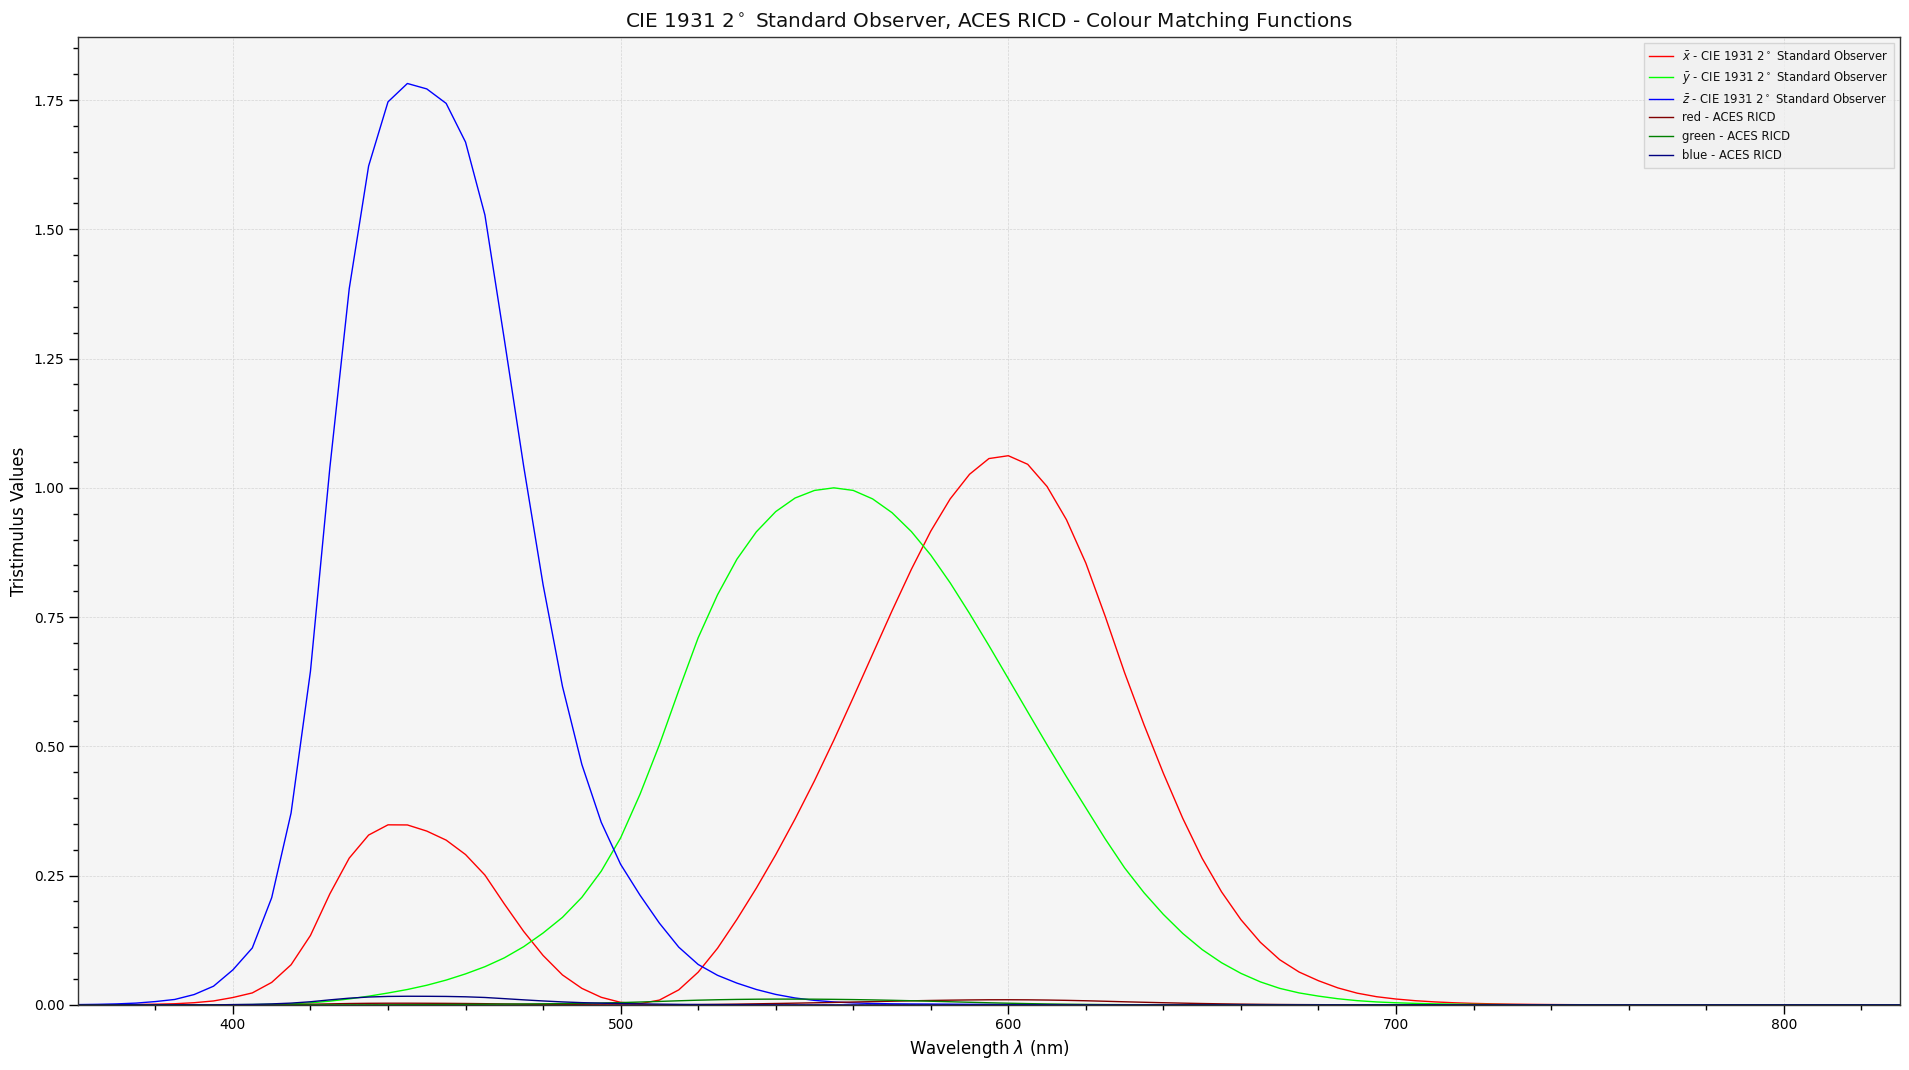

In [0]:
SHAPE = colour.SpectralShape(400, 700, 5)
MITSUBA_SHAPE = colour.SpectralShape(360, 830, 5)


def normalise_multi_signal(multi_signal):
    multi_signal = multi_signal.copy()

    f_n = colour.sd_to_XYZ(colour.sd_ones(), cmfs=multi_signal) / 100
    print('"{0}": {1}'.format(multi_signal.name, f_n))
    multi_signal.values = multi_signal.values / f_n

    return multi_signal


print('CMFS & Camera Sensitivities Normalisation Factors')
INTERPOLATOR = colour.LinearInterpolator
EXTRAPOLATOR_KWARGS = {'right': 0, 'left': 0, 'method': 'constant'}

CMFS_NAME = 'CIE 1931 2 Degree Standard Observer'
CMFS = normalise_multi_signal(colour.CMFS[CMFS_NAME].copy().align(MITSUBA_SHAPE))

COMPOSITE_CAMERA_SENSITIVITIES_DATABASE = {
    name: normalise_multi_signal(sensitivities.copy().align(
        SHAPE).align(MITSUBA_SHAPE, extrapolator_kwargs=EXTRAPOLATOR_KWARGS))
    for name, sensitivities in COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.items()
}

colour.plotting.plot_multi_cmfs(
    [CMFS, COMPOSITE_CAMERA_SENSITIVITIES_DATABASE[CAMERA_NAMES[0]]]);

## Mitsuba Compilation


In [0]:
MITSUBA_COLAB_DIRECTORY = 'mitsuba2'

!rm -rf {MITSUBA_COLAB_DIRECTORY}
!git clone --recursive https://github.com/mitsuba-renderer/mitsuba2
!cd {MITSUBA_COLAB_DIRECTORY} && git submodule update --init --recursive
!cd {MITSUBA_COLAB_DIRECTORY} && git checkout 4472b55d080fa43def78213a92efbb8c43cc9192

Cloning into 'mitsuba2'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 22449 (delta 19), reused 29 (delta 17), pack-reused 22395
Receiving objects: 100% (22449/22449), 6.40 MiB | 4.88 MiB/s, done.
Resolving deltas: 100% (17013/17013), done.
Submodule 'ext/asmjit' (https://github.com/mitsuba-renderer/asmjit) registered for path 'ext/asmjit'
Submodule 'ext/embree' (https://github.com/wjakob/embree) registered for path 'ext/embree'
Submodule 'ext/enoki' (https://github.com/mitsuba-renderer/enoki) registered for path 'ext/enoki'
Submodule 'ext/libjpeg' (https://github.com/mitsuba-renderer/libjpeg) registered for path 'ext/libjpeg'
Submodule 'ext/libpng' (https://github.com/mitsuba-renderer/libpng.git) registered for path 'ext/libpng'
Submodule 'ext/nanogui' (https://github.com/mitsuba-renderer/nanogui) registered for path 'ext/nanogui'
Submodule 'ext/openexr' (https://github.com/mitsuba-

In [0]:
!sudo add-apt-repository -y ppa:ubuntu-toolchain-r/test
!sudo apt update
!sudo apt install gcc-9 g++-9

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [832 kB]
Get:14 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bioni

In [0]:
!sudo apt install clang-9 libc++-9-dev libc++abi-9-dev cmake ninja-build
!sudo apt install libz-dev libpng-dev libjpeg-dev libxrandr-dev libxinerama-dev libxcursor-dev
!sudo apt install python3-dev python3-distutils python3-setuptools

!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-7 700 --slave /usr/bin/g++ g++ /usr/bin/g++-7
!sudo update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-9 900 --slave /usr/bin/g++ g++ /usr/bin/g++-9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following additional packages will be installed:
  binfmt-support libc++1-9 libc++abi1-9 libclang-common-9-dev libclang-cpp9
  libclang1-9 libffi-dev libomp-9-dev libomp5-9 libpfm4 llvm-9 llvm-9-dev
  llvm-9-runtime llvm-9-tools python-chardet python-pkg-resources
  python-pygments python-yaml python3-pkg-resources python3-pygments
  python3-yaml
Suggested packages:
  clang-9-doc libomp-9-doc llvm-9-doc python-setuptools ttf-bitstream-vera
  python3-setuptools
The following NEW packages will be installed:
  binfmt-support clang-9 libc++-9-dev libc++1-9 libc++abi-9-dev libc++abi1-9
  libclang-common-9-dev libclang-cpp9 libclang1-9 libffi-dev libomp-9-dev
  libomp5-9 libpfm4 llvm-9 llvm-9-dev llvm-9-runtime llvm-9-tools ninja-build
  python-chardet python-pkg-resources python-pygments python-yaml
  python3-pkg-resources python3

In [0]:
!cp mitsuba2/resources/mitsuba.conf.template mitsuba2/mitsuba.conf
!sed '/^        "scalar_spectral"/ s/$/,\n        "packet_spectral"/' mitsuba2/mitsuba.conf > mitsuba2/mitsuba.conf.patched
!mv mitsuba2/mitsuba.conf.patched mitsuba2/mitsuba.conf

In [0]:
SPECTRUM_CPP_FILE = 'mitsuba2/src/libcore/spectrum.cpp'

SPECTRUM_CPP_HEADER = """
#include <mitsuba/core/spectrum.h>

NAMESPACE_BEGIN(mitsuba)

// =======================================================================
//! @{ \\name CIE 1931 2 degree observer implementation
// =======================================================================
using Float = float;

static const Float cie1931_tbl[MTS_CIE_SAMPLES * 3] = {
"""[1:]

SPECTRUM_CPP_FOOTER = """
};

const Float *cie1931_x_data = cie1931_tbl;
const Float *cie1931_y_data = cie1931_tbl + MTS_CIE_SAMPLES;
const Float *cie1931_z_data = cie1931_tbl + MTS_CIE_SAMPLES * 2;


void cie_alloc() {
#if defined(MTS_ENABLE_OPTIX)
    static bool cie_alloc_done = false;
    if (cie_alloc_done)
        return;
    const size_t size = MTS_CIE_SAMPLES * 3 * sizeof(Float);
    Float *src = (Float *) cuda_managed_malloc(size);
    memcpy(src, cie1931_tbl, size);

    cie1931_x_data = src;
    cie1931_y_data = src + MTS_CIE_SAMPLES;
    cie1931_z_data = src + MTS_CIE_SAMPLES * 2;
    cie_alloc_done = true;
#endif
}

//! @}
// =======================================================================

NAMESPACE_END(mitsuba)
"""[1:]


def mitsuba2_cpp_format(msds, shape=MITSUBA_SHAPE):
    msds = msds.copy().align(shape)
    I, J, K = colour.utilities.tsplit(msds.values)

    cpp = ''
    for i in [I, J, K]:
        v = list(map(lambda x: 'Float({0:.12f}), '.format(x), i))
        for j in range(0, len(v), 4):
            cpp += '{0}{1}\n'.format(' ' * 4, ''.join(v[j:j+4]))
        
        cpp += '\n'
    
    return cpp


CAMERA = COMPOSITE_CAMERA_SENSITIVITIES_DATABASE[CAMERA_SENSITIVITIES]


if USE_OBSERVER_CMFS:
    subprocess.check_output(
        ['git', 'checkout', '--', SPECTRUM_CPP_FILE.replace('mitsuba2/', '')],
        cwd='mitsuba2')
else:
    with open(SPECTRUM_CPP_FILE, 'w') as cpp_file:
        cpp_file.write(SPECTRUM_CPP_HEADER)
        cpp_file.write(mitsuba2_cpp_format(CAMERA))
        cpp_file.write(SPECTRUM_CPP_FOOTER)

!cat {SPECTRUM_CPP_FILE}

#include <mitsuba/core/spectrum.h>

NAMESPACE_BEGIN(mitsuba)

// =======================================================================
//! @{ \name CIE 1931 2 degree observer implementation
// =======================================================================
using Float = float;

static const Float cie1931_tbl[MTS_CIE_SAMPLES * 3] = {
    Float(0.000000000000), Float(0.000000000000), Float(0.000000000000), Float(0.000000000000), 
    Float(0.000000000000), Float(0.000000000000), Float(-0.000000000000), Float(-0.000000000000), 
    Float(0.010485614473), Float(0.016976764571), Float(0.027872939212), Float(0.045911139488), 
    Float(0.068364488517), Float(0.091252029731), Float(0.104228793080), Float(0.097264168378), 
    Float(0.082568319398), Float(0.073233725147), Float(0.067033997763), Float(0.061663771235), 
    Float(0.060467857476), Float(0.065732922342), Float(0.073269620569), Float(0.079031218216), 
    Float(0.081303090058), Float(0.078668620999), Float(0.075909550008)

In [0]:
MITSUBA_COLAB_BUILD_DIRECTORY = os.path.join(MITSUBA_COLAB_DIRECTORY, 'build')

MITSUBA_BUILD_NAME = 'Mitsuba2-Google-Colab'
if not USE_OBSERVER_CMFS:
    MITSUBA_BUILD_NAME = '{0}_{1}'.format(
        MITSUBA_BUILD_NAME, slugify(CAMERA_SENSITIVITIES))

MITSUBA_BUILD_ZIP_FILE = '{0}.zip'.format(MITSUBA_BUILD_NAME)
MITSUBA_BUILD_ZIP_FILE_PATH = os.path.join(
    MITSUBA_BUILDS_DIRECTORY, MITSUBA_BUILD_ZIP_FILE)

if os.path.exists(MITSUBA_BUILD_ZIP_FILE_PATH):
    print('Build file was found! Unpacking "{0}"!'.format(
        MITSUBA_BUILD_ZIP_FILE_PATH))

    !cp "{MITSUBA_BUILD_ZIP_FILE_PATH}" {MITSUBA_COLAB_DIRECTORY}
    !cd {MITSUBA_COLAB_DIRECTORY} && \
    unzip -o {MITSUBA_BUILD_ZIP_FILE} && \
    rm {MITSUBA_BUILD_ZIP_FILE}
else:
    print('Build file was not found! Compiling...'.format(
        MITSUBA_BUILD_ZIP_FILE_PATH))

    !rm -rf {MITSUBA_COLAB_BUILD_DIRECTORY}
    !mkdir {MITSUBA_COLAB_BUILD_DIRECTORY}
    !cd {MITSUBA_COLAB_BUILD_DIRECTORY} && cmake -GNinja ..
    !cd {MITSUBA_COLAB_BUILD_DIRECTORY} && ninja -j 2
    !cd {MITSUBA_COLAB_DIRECTORY} && \
    zip {MITSUBA_BUILD_ZIP_FILE} -r build && \
    cp {MITSUBA_BUILD_ZIP_FILE} "{MITSUBA_BUILDS_DIRECTORY}" && \
    rm {MITSUBA_BUILD_ZIP_FILE}

Build file was not found! Compiling...
-- The C compiler identification is GNU 9.2.1
-- The CXX compiler identification is GNU 9.2.1
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found PythonInterp: /usr/bin/python3.6 (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- Building the following variants of Mitsuba:
--  * scalar_rgb
--  * scalar_spectral
--  * packet_spectral
-- Setting build type to 'Release' as none was specified.
-- Mitsuba: building the Python plugin.
-- Enoki: building the Python 

In [0]:
os.environ['PATH'] = '/content/mitsuba2/build/dist:{0}'.format(os.environ['PATH'])
os.environ['PYTHONPATH'] = '/content/mitsuba2/build/dist/python:{0}'.format(os.environ['PYTHONPATH'])

sys.path.append('/content/mitsuba2/build/dist/python')

## OpenImageIO

In [0]:
!sudo apt update
!sudo apt-get install -y openimageio-tools

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease
Reading package lists... Done
Building dependency t

## Cornell Box Resources

In [0]:
COLOUR_MITSUBA_DIRECTORY = 'colour-mitsuba'

!rm -rf {COLOUR_MITSUBA_DIRECTORY}
!git clone https://github.com/colour-science/colour-mitsuba.git

Cloning into 'colour-mitsuba'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (254/254), done.
remote: Total 325 (delta 82), reused 309 (delta 66), pack-reused 0
Receiving objects: 100% (325/325), 1.76 MiB | 1.87 MiB/s, done.
Resolving deltas: 100% (82/82), done.


## Rendering

In [0]:
COLOUR_MITSUBA_DIRECTORY = 'colour-mitsuba'
COLOUR_MITSUBA_RESOURCES_DIRECTORY = os.path.join(
    COLOUR_MITSUBA_DIRECTORY, 'colour_mitsuba')
EMITTER_NAME = 'light_source_{0}'.format(slugify(EMITTER).lower())

IMAGE_NAME = 'Cornell_Box_Rigid_Spheres_190_Patch_Roughplastic'
if USE_OBSERVER_CMFS:
    IMAGE_NAME = '{0}_CIE_1931_2_Degree_Standard_Observer_XYZ'.format(
        IMAGE_NAME)
else:
    IMAGE_NAME = '{0}_{1}'.format(IMAGE_NAME, slugify(CAMERA_SENSITIVITIES))

IMAGE_NAME = '{0}_XYZ.exr'.format(IMAGE_NAME)

IMAGE_PATH = os.path.join(COLOUR_MITSUBA_RESOURCES_DIRECTORY, IMAGE_NAME)
IMAGE_PATH_TEMP = os.path.join(
    COLOUR_MITSUBA_RESOURCES_DIRECTORY, '_{0}'.format(IMAGE_NAME))


D_IMAGE_WIDTH = int(IMAGE_WIDTH / RECIPROCAL_QUALITY)
D_IMAGE_HEIGHT = int(IMAGE_WIDTH / RECIPROCAL_QUALITY)
D_SPP = int(SPP / RECIPROCAL_QUALITY ** 2)

# TODO: Investigate why the renderer cannot be imported. Relates to:
# https://stackoverflow.com/questions/52663287/glibcxx-3-4-26-not-found
!cd {COLOUR_MITSUBA_RESOURCES_DIRECTORY} && \
    mitsuba \
    -m packet_spectral \
    -Dwidth={D_IMAGE_WIDTH} \
    -Dheight={D_IMAGE_HEIGHT} \
    -Dspp={D_SPP} \
    -Demitter_ceiling_light={EMITTER_NAME} \
    cornell_box_rigid_spheres.xml \
    -o {IMAGE_NAME}

2020-03-23 19:18:40 INFO  main  [mitsuba.cpp:194] Mitsuba version 2.0.0 (HEAD[4472b55d], Linux, 64bit, 2 threads, 8-wide SIMD)
2020-03-23 19:18:40 INFO  main  [mitsuba.cpp:195] Copyright 2019, Realistic Graphics Lab, EPFL
2020-03-23 19:18:40 INFO  main  [mitsuba.cpp:196] Enabled processor features: avx2 avx fma f16c sse4.2 x86_64
2020-03-23 19:18:40 INFO  main  [xml.cpp:1117] Loading XML file "cornell_box_rigid_spheres.xml" ..
2020-03-23 19:18:40 INFO  main  [xml.cpp:1118] Using variant "packet_spectral"
2020-03-23 19:18:40 INFO  main  [xml.cpp:616] Loading included XML file "/content/colour-mitsuba/colour_mitsuba/include/integrator.xml" ..
2020-03-23 19:18:40 INFO  main  [xml.cpp:616] Loading included XML file "/content/colour-mitsuba/colour_mitsuba/include/emitters.xml" ..
2020-03-23 19:18:40 INFO  main  [PluginManager] Loading plugin "plugins/regular.so" ..
2020-03-23 19:18:40 INFO  main  [xml.cpp:616] Loading included XML file "/content/colour-mitsuba/colour_mitsuba/include/emitter

In [0]:
!oiiotool --ch R=X,G=Y,B=Z {IMAGE_PATH} -o {IMAGE_PATH_TEMP}
!mv {IMAGE_PATH_TEMP} {IMAGE_PATH}

colour/colour/utilities/verbose.py:235: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


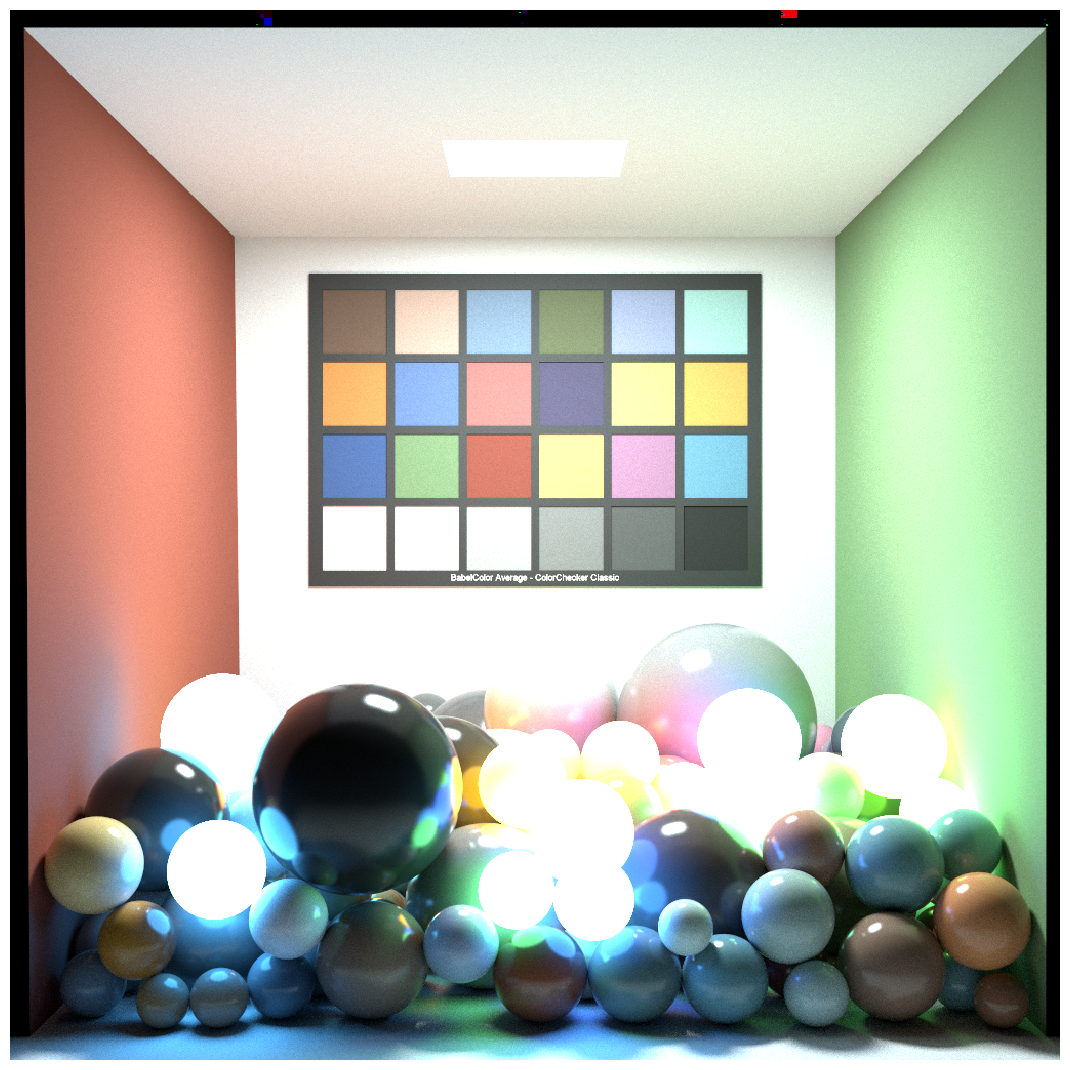

In [0]:
colour.plotting.plot_image(colour.cctf_encoding(colour.read_image(IMAGE_PATH)));

In [0]:
shutil.copyfile(IMAGE_PATH, os.path.join(OUTPUT_DIRECTORY, 'images', IMAGE_NAME))

'/content/drive/My Drive/Fast.io/academy-vwg-gm-mitsuba-spectral-images.imfast.io/images/Cornell_Box_Rigid_Spheres_190_Patch_Roughplastic_Pentax_K_5_XYZ.exr'